# Step 1
L'idea è quella di utilizzare l'informazione nota della massa della $Z^0$ per poter riuscire ad aumentare l'efficienza di muoni selezionati, in particolare il nostro obiettivo è quello di abbattere il fondo e il noise. Di seguito mostro quell che dovrebbe essere l'idea generale, sperando di non fotttere tutto
* Grafico la massa ricostruita utilizzando due $\mu$ OS
* Ricerco vari tagli da poter effettuare così da selezionare solo determinati muoni
    + Utilizzo dunque un metodo del tipo _tag and probe_ 
        - Studiando i file DYJets e TTDilep Cerco di capire i migliori range dove effettuare dei tagli
        - Seleziono per ogni evento i muoni "tag" e poi con criteri meno stringenti cerco un probe
        - Il solo utilizzare questo metodo dovrebbe garantire un certo abbattimento del noise, dato che non sto pigliando tutti i muoni a caso senza senso
* Rifaccio il grafico della massa, studiandomi in particolare le OS (che già so essere un segnale)  dopo che ho effettuato tutti i tagli che ho nuovamente ritrovato, sperando che ciò vadad bene

In [1]:
import ROOT

Welcome to JupyROOT 6.26/04


In [12]:
fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

fileTT = ROOT.TFile("./datas/TTDilep.root","OPEN")
tttr = fileTT.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

In [7]:
class particle:
    def __init__(self, pt,eta,phi,e,charge,flavor):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.e=e
        self.charge=charge
        self.flavor=flavor
        self.p4.SetPtEtaPhiE(pt,eta,phi,e)
        
#2 Metodo per estrarla:    
def get_particle(tree,var="muontracks",index=0):
    flav_dict={"muontracks":13,"electrons":11} #questi numeri sono delle convenzioni date sul PDG che permettono di identificare le particelle in qualche modo
    p = particle(getattr(tree,var+"_pt")[index],#getattr chiama dall'esterno un attributo con il nome preso come stringa
                getattr(tree,var+"_eta")[index],
                getattr(tree,var+"_phi")[index],
                getattr(tree,var+"_e")[index],
                getattr(tree,var+"_charge")[index] if hasattr(tree,var+"_charge") else 0,#nota: questo per i jet fallirà se non faccio qualcosa!
                -1*getattr(tree,var+"_charge")[index]*(flav_dict[var]) if hasattr(tree,var+"_charge") else 0)
    return p

def get_collection(tree,var="muontracks"):
    particles=[get_particle(tree,var,i) for i in range(getattr(tree,var+"_size"))]
    return particles

## DYJets

Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: DY_mu_mass (Potential memory leak).


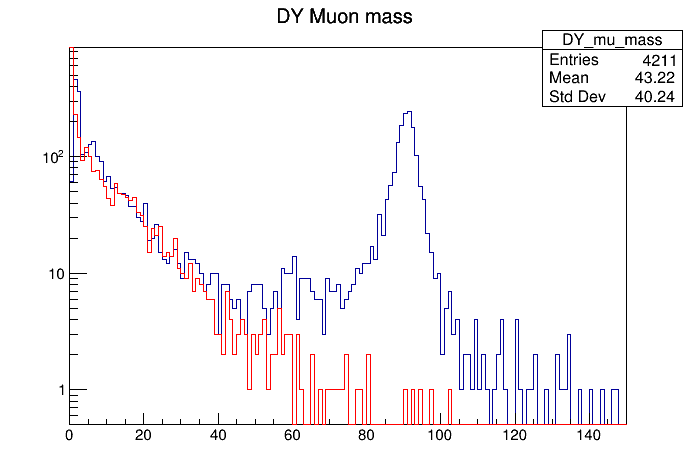

In [11]:
are_os = lambda x,y: x.charge*y.charge<0
h_mu_mass_os = ROOT.TH1F("DY_mu_mass","DY Muon mass",150,0,150) 
h_mu_mass_ss = ROOT.TH1F("DY_mu_mass","DY Muon mass",150,0,150)

c=ROOT.TCanvas()

for i in range(dytr.GetEntries()):
    dytr.GetEntry(i)
    muons=get_collection(dytr,"muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_mu_mass_os.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_mu_mass_ss.Fill((muons[mi].p4+muons[mj].p4).M())
c.Draw()
c.SetLogy()
h_mu_mass_os.Draw()
h_mu_mass_ss.SetLineColor(ROOT.kRed)
h_mu_mass_ss.Draw("same")